# Machine Learning for Exoplanet Validation: Kepler KOI Analysis

The Kepler Mission, launched by NASA in 2009, aimed to discover Earth-like planets in our galaxy using the transit method, which detects dips in starlight caused by planets passing in front of their host stars. By continuously monitoring over 150,000 stars, Kepler identified numerous potential exoplanets, known as Kepler Objects of Interest (KOIs). These KOIs undergo validation to classify them as either CONFIRMED exoplanets or FALSE POSITIVES. This project leverages the KOI dataset to build machine learning models that predict the disposition of each candidate, enhancing exoplanet validation efforts.

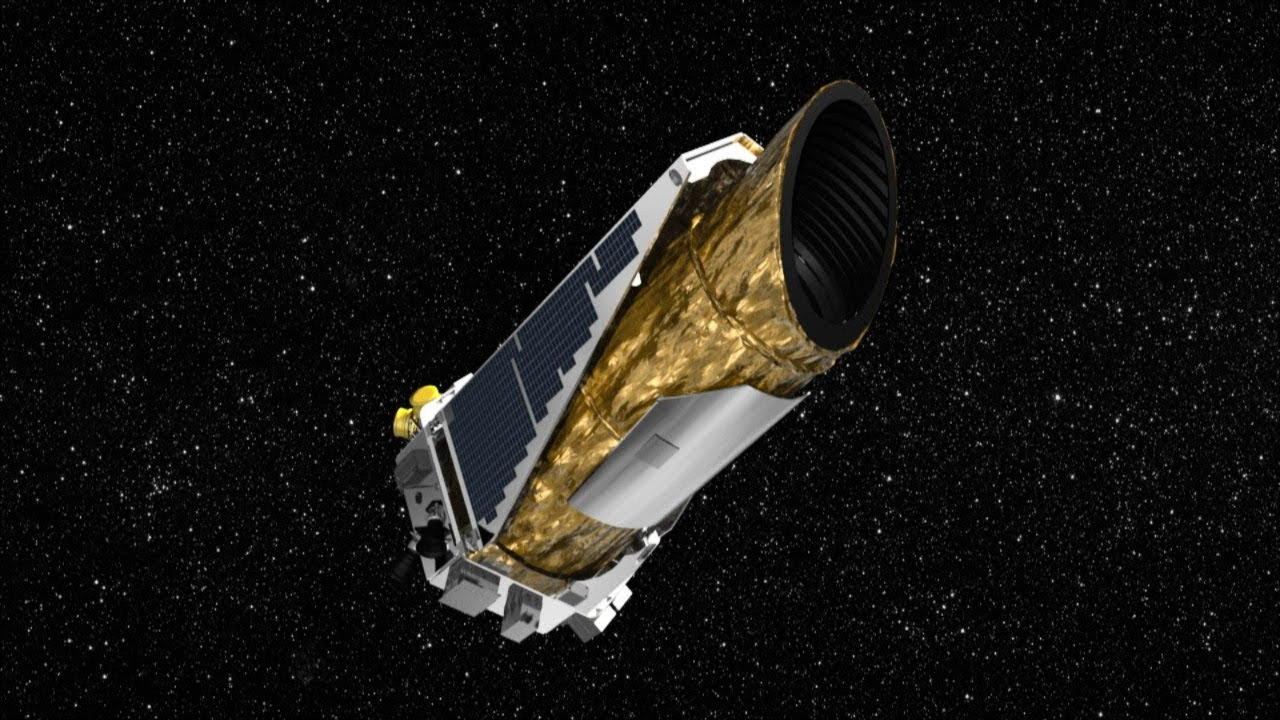

In [11]:
# Import useful libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import numpy as np

In [12]:
# Setting up pandas options to see the dataset entirely
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# Importing the dataset Kepler Object of Interest (KOI)
df = pd.read_csv("dataset.csv", skiprows=range(53))

## Preprocessing the Data

In [13]:
# Getting to know the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9564 entries, 0 to 9563
Data columns (total 49 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   kepid              9564 non-null   int64  
 1   kepoi_name         9564 non-null   object 
 2   kepler_name        2745 non-null   object 
 3   koi_disposition    9564 non-null   object 
 4   koi_pdisposition   9564 non-null   object 
 5   koi_score          8054 non-null   float64
 6   koi_fpflag_nt      9564 non-null   int64  
 7   koi_fpflag_ss      9564 non-null   int64  
 8   koi_fpflag_co      9564 non-null   int64  
 9   koi_fpflag_ec      9564 non-null   int64  
 10  koi_period         9564 non-null   float64
 11  koi_period_err1    9110 non-null   float64
 12  koi_period_err2    9110 non-null   float64
 13  koi_time0bk        9564 non-null   float64
 14  koi_time0bk_err1   9110 non-null   float64
 15  koi_time0bk_err2   9110 non-null   float64
 16  koi_impact         9201 

In [16]:
df.head()

,kepid,kepoi_name,kepler_name,koi_disposition,koi_pdisposition,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,koi_time0bk_err2,koi_impact,koi_impact_err1,koi_impact_err2,koi_duration,koi_duration_err1,koi_duration_err2,koi_depth,koi_depth_err1,koi_depth_err2,koi_prad,koi_prad_err1,koi_prad_err2,koi_teq,koi_teq_err1,koi_teq_err2,koi_insol,koi_insol_err1,koi_insol_err2,koi_model_snr,koi_tce_plnt_num,koi_tce_delivname,koi_steff,koi_steff_err1,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,10797460,K00752.01,Kepler-227 b,CONFIRMED,CANDIDATE,1.000,0,0,0,0,9.488036,2.775000e-05,-2.775000e-05,170.538750,0.002160,-0.002160,0.146,0.318,-0.146,2.95750,0.08190,-0.08190,615.8,19.5,-19.5,2.26,0.26,-0.15,793.0,NaN,NaN,93.59,29.45,-16.65,35.8,1.0,q1_q17_dr25_tce,5455.0,81.0,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,10797460,K00752.02,Kepler-227 c,CONFIRMED,CANDIDATE,0.969,0,0,0,0,54.418383,2.479000e-04,-2.479000e-04,162.513840,0.003520,-0.003520,0.586,0.059,-0.443,4.50700,0.11600,-0.11600,874.8,35.5,-35.5,2.83,0.32,-0.19,443.0,NaN,NaN,9.11,2.87,-1.62,25.8,2.0,q1_q17_dr25_tce,5455.0,81.0,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
2,10811496,K00753.01,NaN,CANDIDATE,CANDIDATE,0.000,0,0,0,0,19.899140,1.494000e-05,-1.494000e-05,175.850252,0.000581,-0.000581,0.969,5.126,-0.077,1.78220,0.03410,-0.03410,10829.0,171.0,-171.0,14.60,3.92,-1.31,638.0,NaN,NaN,39.30,31.04,-10.49,76.3,1.0,q1_q17_dr25_tce,5853.0,158.0,-176.0,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
3,10848459,K00754.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,0,0,1.736952,2.630000e-07,-2.630000e-07,170.307565,0.000115,-0.000115,1.276,0.115,-0.092,2.40641,0.00537,-0.00537,8079.2,12.8,-12.8,33.46,8.50,-2.83,1395.0,NaN,NaN,891.96,668.95,-230.35,505.6,1.0,q1_q17_dr25_tce,5805.0,157.0,-174.0,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
4,10854555,K00755.01,Kepler-664 b,CONFIRMED,CANDIDATE,1.000,0,0,0,0,2.525592,3.761000e-06,-3.761000e-06,171.595550,0.001130,-0.001130,0.701,0.235,-0.478,1.65450,0.04200,-0.04200,603.3,16.9,-16.9,2.75,0.88,-0.35,1406.0,NaN,NaN,926.16,874.33,-314.24,40.9,1.0,q1_q17_dr25_tce,6031.0,169.0,-211.0,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509


In [29]:
#Deleting unrelevant features
df.drop(["koi_teq_err1", "koi_teq_err2", "koi_tce_delivname", "koi_tce_plnt_num","koi_score"], axis=1, inplace=True)

#Deleting the Candidate value for the koi_disposition column because we will not predict it
df_filtered=df[df["koi_disposition"] != "CANDIDATE"]

#To make it easier for the ML algorithm to work let's map 0 and 1 to False Positive and Confirmed
df_filtered['koi_disposition'] = df_filtered['koi_disposition'].map({
    'CONFIRMED': 1,
    'FALSE POSITIVE': 0
})

C:\Users\nicol\AppData\Local\Temp\ipykernel_4368\2063512101.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['koi_disposition'] = df_filtered['koi_disposition'].map({


In [31]:
#Getting the count of missing values for each column
df_filtered.isna().sum()

kepid                   0
kepoi_name              0
kepler_name          4837
koi_disposition         0
koi_pdisposition        0
koi_score             910
koi_fpflag_nt           0
koi_fpflag_ss           0
koi_fpflag_co           0
koi_fpflag_ec           0
koi_period              0
koi_period_err1       338
koi_period_err2       338
koi_time0bk             0
koi_time0bk_err1      338
koi_time0bk_err2      338
koi_impact            259
koi_impact_err1       338
koi_impact_err2       338
koi_duration            0
koi_duration_err1     338
koi_duration_err2     338
koi_depth             259
koi_depth_err1        338
koi_depth_err2        338
koi_prad              259
koi_prad_err1         259
koi_prad_err2         259
koi_teq               259
koi_insol             219
koi_insol_err1        219
koi_insol_err2        219
koi_model_snr         259
koi_steff             259
koi_steff_err1        358
koi_steff_err2        373
koi_slogg             259
koi_slogg_err1        358
koi_slogg_er

We can notice a high number of missing values for many features. We previously deleted the features "koi_teq_err1" and "kkoi_teq_err" because of their respective high number of missing values. To assess these values we will first try to recognize any interesting pattern of missing values.2   

<Axes: >

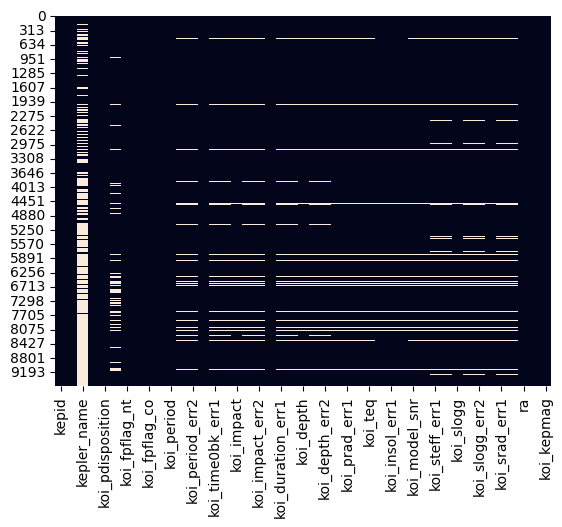

In [32]:
sns.heatmap(df_filtered.isna(), cbar=False)

<Axes: >

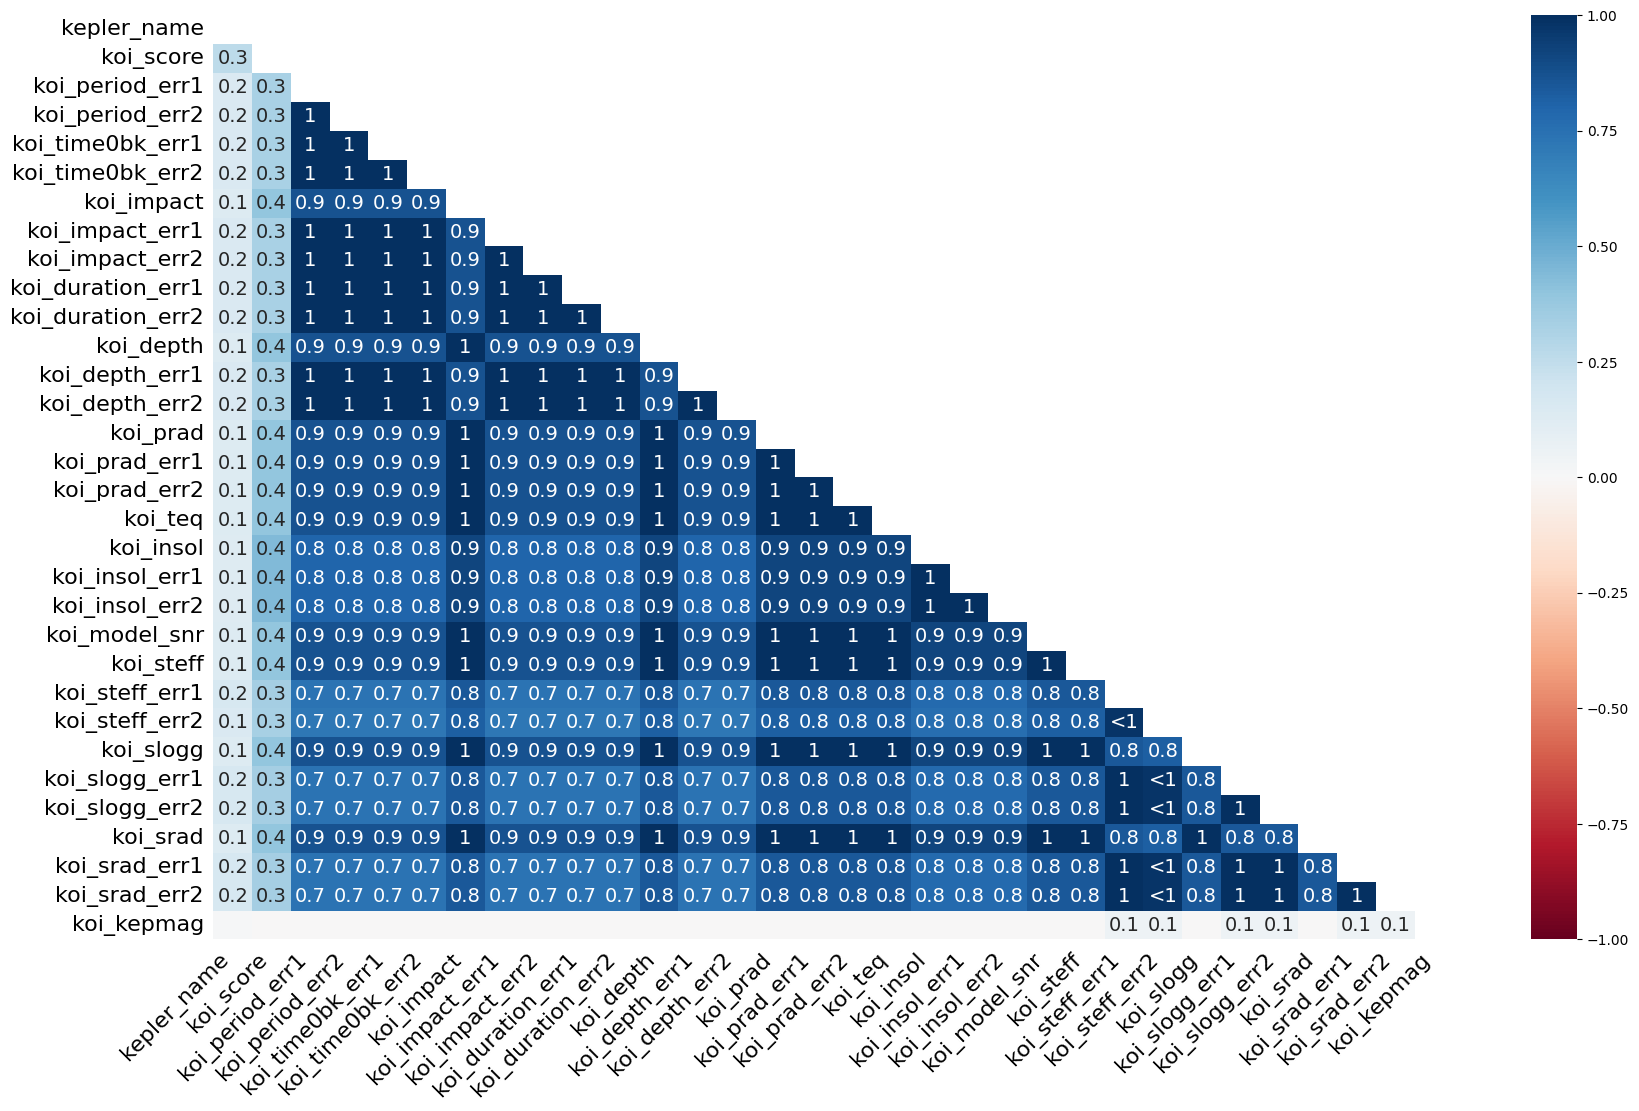

In [35]:
msno.heatmap(df_filtered)

There are no obvious correlations or patterns within the missing data. Let's establish a threshold for the acceptable amount of missing data, below which we can safely discard it.

In [40]:
# Find the five percent threshold
threshold = len(df_filtered) * 0.05

cols_to_drop = df_filtered.columns[df_filtered.isna().sum() <= threshold]
cols_to_drop

Index(['kepid', 'kepoi_name', 'koi_disposition', 'koi_pdisposition',
       'koi_fpflag_nt', 'koi_fpflag_ss', 'koi_fpflag_co', 'koi_fpflag_ec',
       'koi_period', 'koi_period_err1', 'koi_period_err2', 'koi_time0bk',
       'koi_time0bk_err1', 'koi_time0bk_err2', 'koi_impact', 'koi_impact_err1',
       'koi_impact_err2', 'koi_duration', 'koi_duration_err1',
       'koi_duration_err2', 'koi_depth', 'koi_depth_err1', 'koi_depth_err2',
       'koi_prad', 'koi_prad_err1', 'koi_prad_err2', 'koi_teq', 'koi_insol',
       'koi_insol_err1', 'koi_insol_err2', 'koi_model_snr', 'koi_steff',
       'koi_steff_err1', 'koi_steff_err2', 'koi_slogg', 'koi_slogg_err1',
       'koi_slogg_err2', 'koi_srad', 'koi_srad_err1', 'koi_srad_err2', 'ra',
       'dec', 'koi_kepmag'],
      dtype='object')

In [41]:
df_filtered.dropna(subset=cols_to_drop, inplace=True)

C:\Users\nicol\AppData\Local\Temp\ipykernel_4368\3353236254.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.dropna(subset=cols_to_drop, inplace=True)


In [42]:
df_filtered.isna().sum()

kepid                   0
kepoi_name              0
kepler_name          4405
koi_disposition         0
koi_pdisposition        0
koi_score             688
koi_fpflag_nt           0
koi_fpflag_ss           0
koi_fpflag_co           0
koi_fpflag_ec           0
koi_period              0
koi_period_err1         0
koi_period_err2         0
koi_time0bk             0
koi_time0bk_err1        0
koi_time0bk_err2        0
koi_impact              0
koi_impact_err1         0
koi_impact_err2         0
koi_duration            0
koi_duration_err1       0
koi_duration_err2       0
koi_depth               0
koi_depth_err1          0
koi_depth_err2          0
koi_prad                0
koi_prad_err1           0
koi_prad_err2           0
koi_teq                 0
koi_insol               0
koi_insol_err1          0
koi_insol_err2          0
koi_model_snr           0
koi_steff               0
koi_steff_err1          0
koi_steff_err2          0
koi_slogg               0
koi_slogg_err1          0
koi_slogg_er

In [43]:
df_filtered.head()

,kepid,kepoi_name,kepler_name,koi_disposition,koi_pdisposition,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,koi_time0bk_err2,koi_impact,koi_impact_err1,koi_impact_err2,koi_duration,koi_duration_err1,koi_duration_err2,koi_depth,koi_depth_err1,koi_depth_err2,koi_prad,koi_prad_err1,koi_prad_err2,koi_teq,koi_insol,koi_insol_err1,koi_insol_err2,koi_model_snr,koi_steff,koi_steff_err1,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,10797460,K00752.01,Kepler-227 b,1,CANDIDATE,1.000,0,0,0,0,9.488036,2.775000e-05,-2.775000e-05,170.538750,0.002160,-0.002160,0.146,0.318,-0.146,2.95750,0.08190,-0.08190,615.8,19.5,-19.5,2.26,0.26,-0.15,793.0,93.59,29.45,-16.65,35.8,5455.0,81.0,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,10797460,K00752.02,Kepler-227 c,1,CANDIDATE,0.969,0,0,0,0,54.418383,2.479000e-04,-2.479000e-04,162.513840,0.003520,-0.003520,0.586,0.059,-0.443,4.50700,0.11600,-0.11600,874.8,35.5,-35.5,2.83,0.32,-0.19,443.0,9.11,2.87,-1.62,25.8,5455.0,81.0,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
3,10848459,K00754.01,NaN,0,FALSE POSITIVE,0.000,0,1,0,0,1.736952,2.630000e-07,-2.630000e-07,170.307565,0.000115,-0.000115,1.276,0.115,-0.092,2.40641,0.00537,-0.00537,8079.2,12.8,-12.8,33.46,8.50,-2.83,1395.0,891.96,668.95,-230.35,505.6,5805.0,157.0,-174.0,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
4,10854555,K00755.01,Kepler-664 b,1,CANDIDATE,1.000,0,0,0,0,2.525592,3.761000e-06,-3.761000e-06,171.595550,0.001130,-0.001130,0.701,0.235,-0.478,1.65450,0.04200,-0.04200,603.3,16.9,-16.9,2.75,0.88,-0.35,1406.0,926.16,874.33,-314.24,40.9,6031.0,169.0,-211.0,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509
5,10872983,K00756.01,Kepler-228 d,1,CANDIDATE,1.000,0,0,0,0,11.094321,2.036000e-05,-2.036000e-05,171.201160,0.001410,-0.001410,0.538,0.030,-0.428,4.59450,0.06100,-0.06100,1517.5,24.2,-24.2,3.90,1.27,-0.42,835.0,114.81,112.85,-36.70,66.5,6046.0,189.0,-232.0,4.486,0.054,-0.229,0.972,0.315,-0.105,296.28613,48.224670,15.714


### Work on the distribution

In [8]:
df_filtered.describe()

,kepid,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,koi_time0bk_err2,koi_impact,koi_impact_err1,koi_impact_err2,koi_duration,koi_duration_err1,koi_duration_err2,koi_depth,koi_depth_err1,koi_depth_err2,koi_prad,koi_prad_err1,koi_prad_err2,koi_teq,koi_insol,koi_insol_err1,koi_insol_err2,koi_model_snr,koi_steff,koi_steff_err1,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
count,9.564000e+03,8054.000000,9564.000000,9564.000000,9564.000000,9564.000000,9564.000000,9110.000000,9110.000000,9564.000000,9110.000000,9110.000000,9201.000000,9110.000000,9110.000000,9564.000000,9110.000000,9110.000000,9.201000e+03,9110.000000,9110.000000,9201.000000,9201.000000,9201.000000,9201.000000,9.243000e+03,9.243000e+03,9.243000e+03,9201.000000,9201.000000,9096.000000,9081.000000,9201.000000,9096.000000,9096.000000,9201.000000,9096.000000,9096.000000,9564.000000,9564.000000,9563.000000
mean,7.690628e+06,0.480829,0.208595,0.232748,0.197512,0.120033,75.671358,0.002148,-0.002148,166.183251,0.009933,-0.009933,0.735105,1.959861,-0.332557,5.621606,0.339942,-0.339942,2.379134e+04,123.197563,-123.197563,102.891778,17.657684,-33.023314,1085.385828,7.745737e+03,3.750698e+03,-4.043522e+03,259.895001,5706.823280,144.635554,-162.265059,4.310157,0.120738,-0.143161,1.728712,0.362292,-0.394806,292.060163,43.810433,14.264606
std,2.653459e+06,0.476928,4.767290,0.422605,0.398142,0.325018,1334.744046,0.008236,0.008236,67.918960,0.023097,0.023097,3.348832,9.421653,1.249828,6.471554,0.669823,0.669823,8.224268e+04,4112.615230,4112.615230,3077.639126,391.138501,1193.519910,856.351161,1.592047e+05,5.504421e+04,8.838831e+04,795.806615,796.857947,47.052305,72.746348,0.432606,0.132837,0.085477,6.127185,0.930870,2.168213,4.766657,3.601243,1.385448
min,7.574500e+05,0.000000,0.000000,0.000000,0.000000,0.000000,0.241843,0.000000,-0.172500,120.515914,0.000009,-0.569000,0.000000,0.000000,-59.320000,0.052000,0.000000,-20.200000,0.000000e+00,0.000000,-388600.000000,0.080000,0.000000,-77180.000000,25.000000,0.000000e+00,0.000000e+00,-5.600031e+06,0.000000,2661.000000,0.000000,-1762.000000,0.047000,0.000000,-1.207000,0.109000,0.000000,-116.137000,279.852720,36.577381,6.966000
25%,5.556034e+06,0.000000,0.000000,0.000000,0.000000,0.000000,2.733684,0.000005,-0.000276,132.761718,0.001240,-0.010500,0.197000,0.040000,-0.445000,2.437750,0.050800,-0.350000,1.599000e+02,9.600000,-49.500000,1.400000,0.230000,-1.940000,539.000000,2.015000e+01,9.190000e+00,-2.873100e+02,12.000000,5310.000000,106.000000,-198.000000,4.218000,0.042000,-0.196000,0.829000,0.129000,-0.250000,288.660770,40.777173,13.440000
50%,7.906892e+06,0.334000,0.000000,0.000000,0.000000,0.000000,9.752831,0.000035,-0.000035,137.224595,0.004130,-0.004130,0.537000,0.193000,-0.207000,3.792600,0.142000,-0.142000,4.211000e+02,20.750000,-20.750000,2.390000,0.520000,-0.300000,878.000000,1.416000e+02,7.283000e+01,-4.026000e+01,23.000000,5767.000000,157.000000,-160.000000,4.438000,0.070000,-0.128000,1.000000,0.251000,-0.111000,292.261125,43.677504,14.520000
75%,9.873066e+06,0.998000,0.000000,0.000000,0.000000,0.000000,40.715178,0.000276,-0.000005,170.694603,0.010500,-0.001240,0.889000,0.378000,-0.046000,6.276500,0.350000,-0.050800,1.473400e+03,49.500000,-9.600000,14.930000,2.320000,-0.140000,1379.000000,8.702900e+02,5.194150e+02,-5.160000e+00,78.000000,6112.000000,174.000000,-114.000000,4.543000,0.149000,-0.088000,1.345000,0.364000,-0.069000,295.859160,46.714611,15.322000
max,1.293514e+07,1.000000,465.000000,1.000000,1.000000,1.000000,129995.778400,0.172500,0.000000,1472.522306,0.569000,-0.000009,100.806000,85.540000,0.000000,138.540000,20.200000,0.000000,1.541400e+06,388600.000000,0.000000,200346.000000,21640.000000,0.000000,14667.000000,1.094755e+07,3.617133e+06,0.000000e+00,9054.700000,15896.000000,676.000000,0.000000,5.364000,1.472000,0.000000,229.908000,33.091000,0.000000,301.720760,52.

In [45]:
columns_of_interest = ['kepid','koi_disposition','koi_period','koi_impact', 'koi_duration','koi_depth',
       'koi_prad','koi_teq', 'koi_insol','koi_model_snr', 'koi_steff',
       'koi_slogg', 'koi_srad', 'ra',
       'dec', 'koi_kepmag']
columns_of_interest_with_err = ['kepid','koi_disposition','koi_period','koi_impact', 'koi_duration','koi_depth',
       'koi_prad','koi_teq', 'koi_insol','koi_model_snr', 'koi_steff',
       'koi_slogg', 'koi_srad', 'ra',
       'dec', 'koi_kepmag','koi_period_err1', 'koi_period_err2', 'koi_time0bk_err1', 'koi_time0bk_err2',
    'koi_impact_err1', 'koi_impact_err2', 'koi_duration_err1', 'koi_duration_err2',
    'koi_depth_err1', 'koi_depth_err2', 'koi_insol_err1', 'koi_insol_err2',
    'koi_steff_err1', 'koi_steff_err2', 'koi_slogg_err1', 'koi_slogg_err2',
    'koi_srad_err1', 'koi_srad_err2']


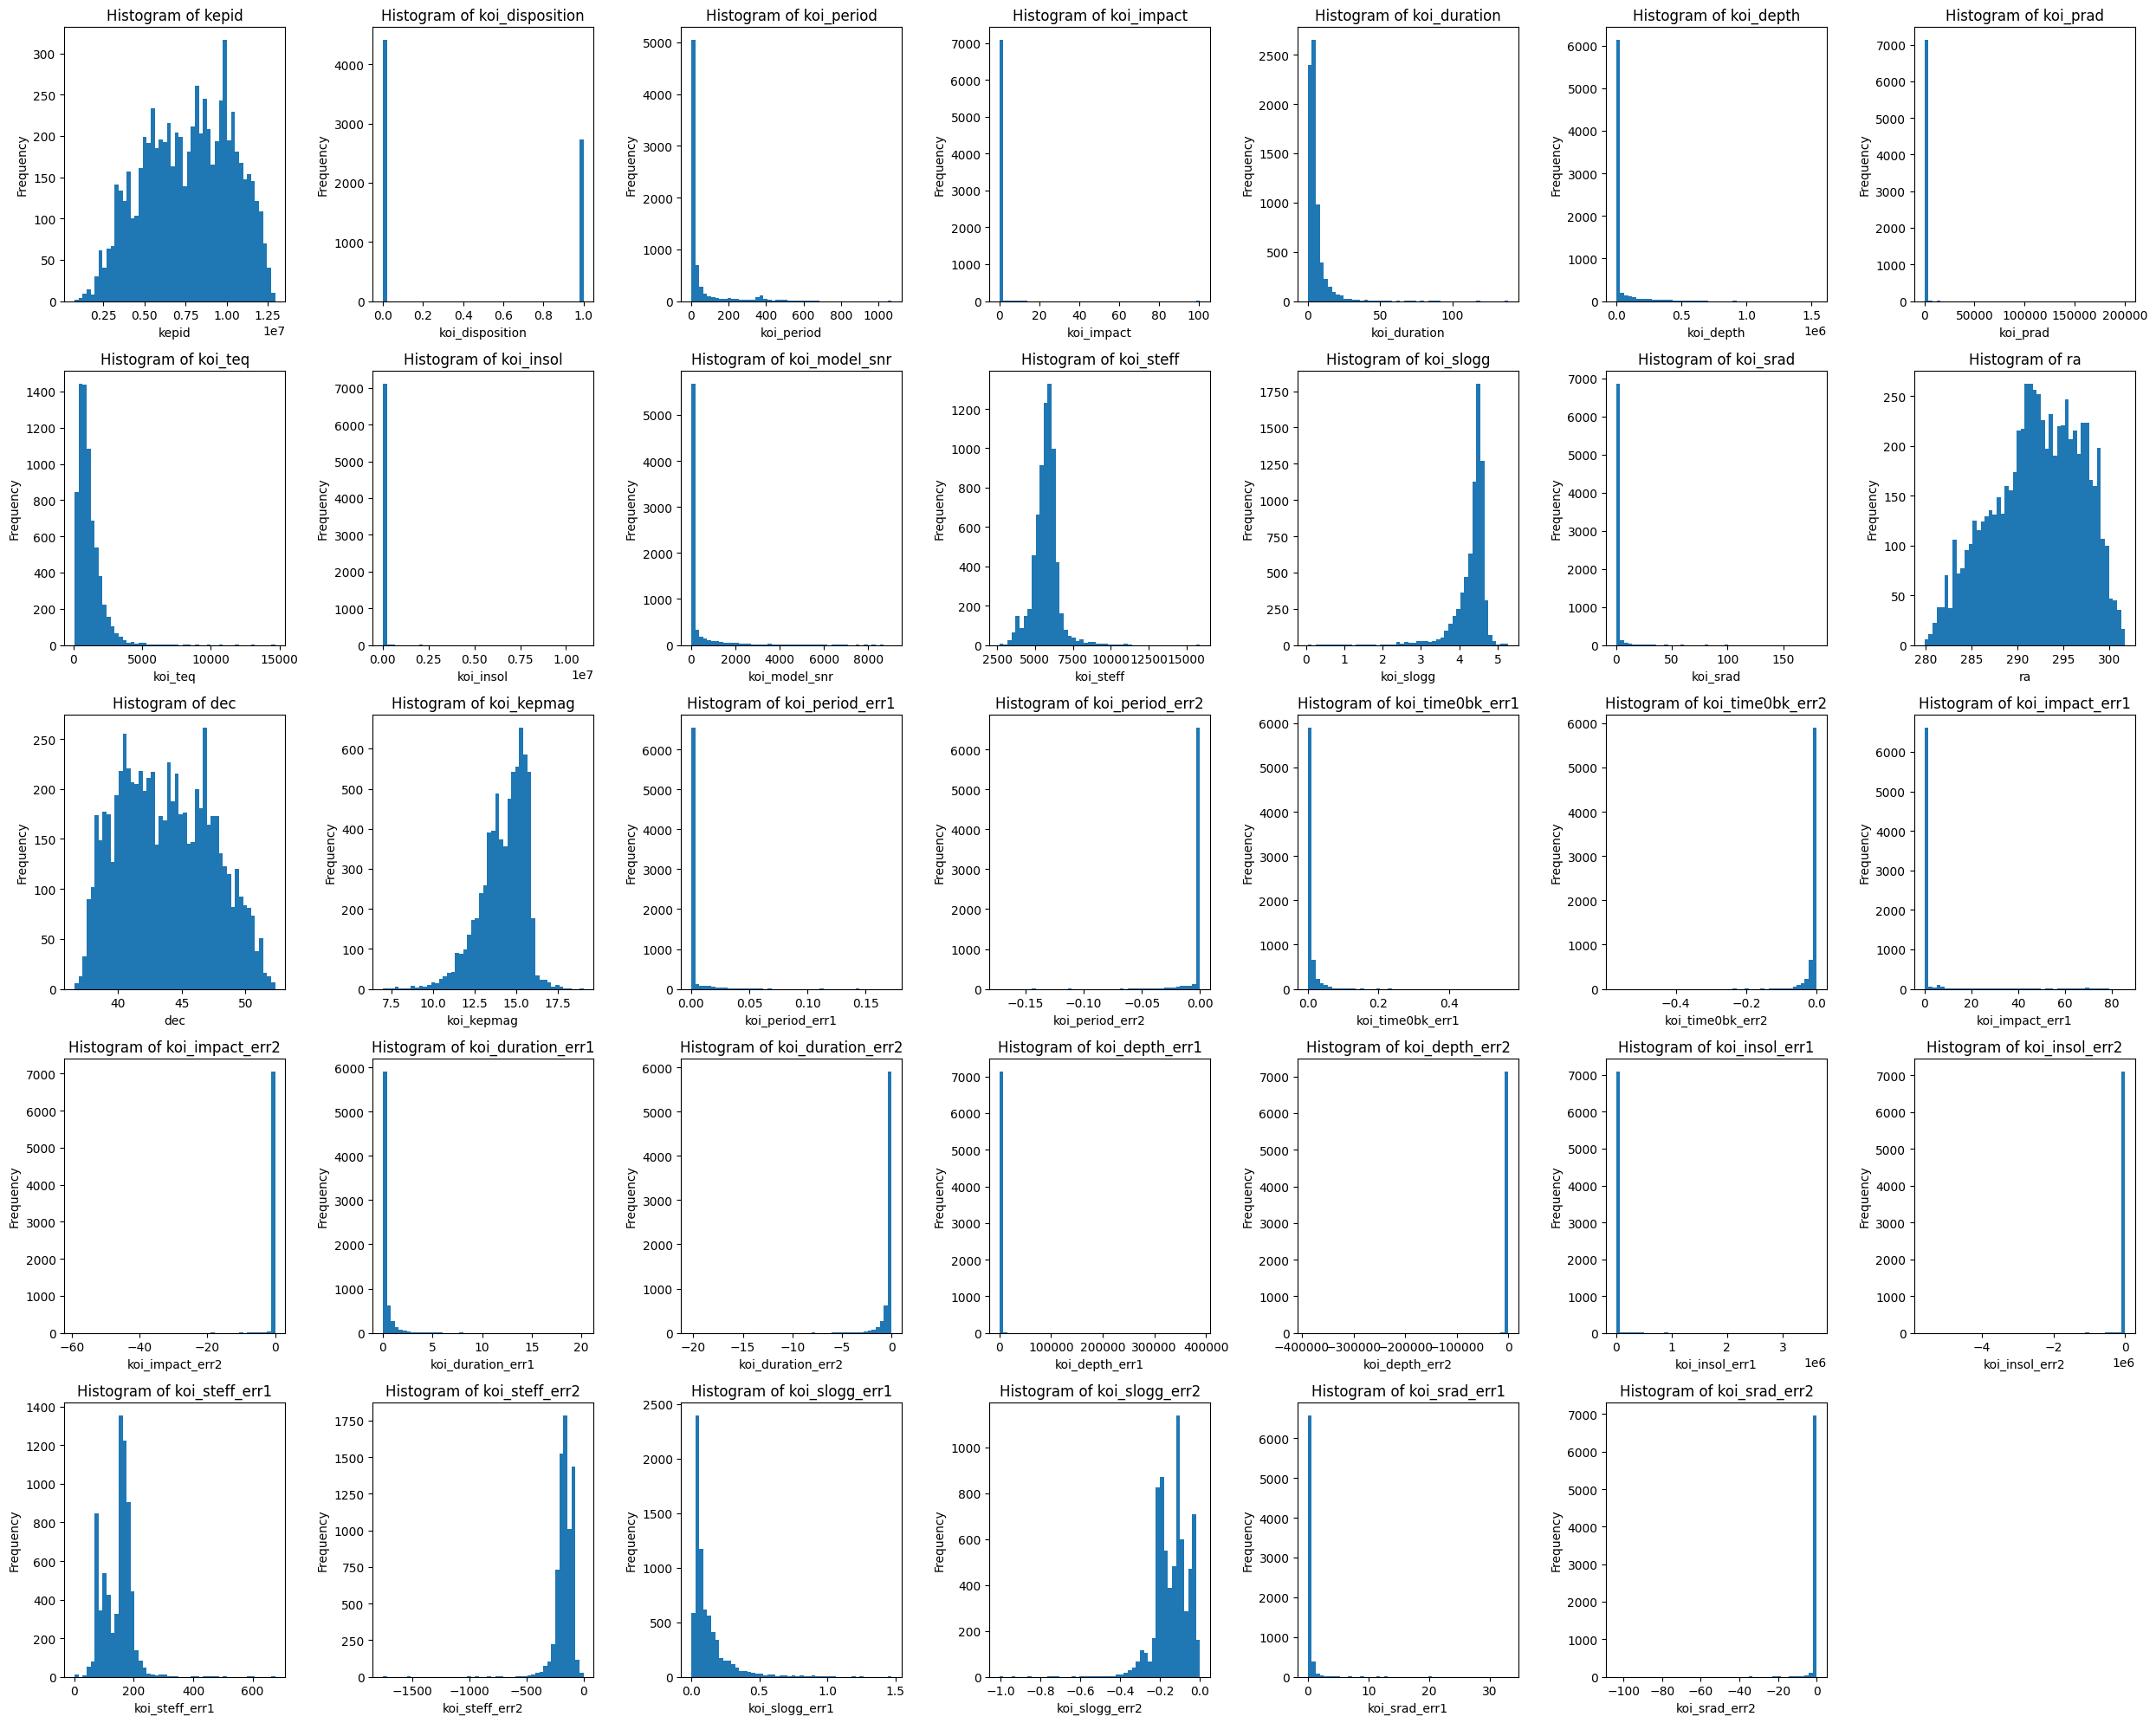

In [49]:
# Create a figure and an array of axes
fig, axs = plt.subplots(nrows=5, ncols=7, figsize=(25, 20))  # Adjust layout to fit all subplots

# Flatten the array of axes for easier iteration
axs = axs.flatten()

# Loop through the columns of interest and corresponding axes
for ax, column in zip(axs, columns_of_interest_with_err):
    ax.hist(df_filtered[column].dropna(), bins=50)  # Use 50 bins
    ax.set_title(f'Histogram of {column}')
    ax.set_xlabel(column)
    ax.set_ylabel('Frequency')

# Disable unused axes if there are any (if you have fewer than 35 columns)
for ax in axs[len(columns_of_interest_with_err):]:
    ax.set_visible(False)

# Adjust spacings to avoid overlapping
plt.tight_layout()
plt.show()


The data show a significant degree of skewness, primarily due to the substantial size differences observed across the universe. This skewness stems not just from outliers, but also from inherent size variations that are crucial to retain to preserve the integrity and meaning of our data. To address this, the most appropriate transformations are the logarithmic and exponential scales. However, we can only apply the logarithmic transformation to the columns of interest that do not include error measurements, as these columns may contain negative values which are not suitable for logarithmic scaling.

For our machine learning algorithms we will want to create 4 datasets:
- df_filtered_main: DF without transformations, without errors
- df_filtered_with_err: DF without transformations, with errors
- df_filtered_unskewed: DF unskewed, without errors
- df_filtered_unskewed_with_err: DF unskewed, with errors

In [50]:
df_filtered_main = df_filtered[columns_of_interest]
df_filtered_with_err = df_filtered[columns_of_interest_with_err]

In [54]:
df_filtered_unskewed = pd.DataFrame()

transformations = {
    'koi_slogg': np.exp,
    'koi_duration': np.log,
    'koi_teq': np.log,
    'koi_steff': np.log,
    'koi_insol': np.log,
    'koi_period': np.log,
    'koi_depth': np.log,
    'koi_prad': np.log,
    'koi_impact': lambda x: np.log(x + 0.01),  # Adding a small constant only here
    'koi_model_snr': np.log,
    'koi_srad': np.log
}

for column, func in transformations.items():
    df_filtered_unskewed[column] = func(df_filtered_main[column])

df_filtered_unskewed["koi_disposition"] = df_filtered_main["koi_disposition"]
df_filtered_unskewed["kepid"] = df_filtered_main["kepid"]
df_filtered_unskewed["ra"] = df_filtered_main["ra"]
df_filtered_unskewed["dec"] = df_filtered_main["dec"]
df_filtered_unskewed["koi_kepmag"] = df_filtered_main["koi_kepmag"]

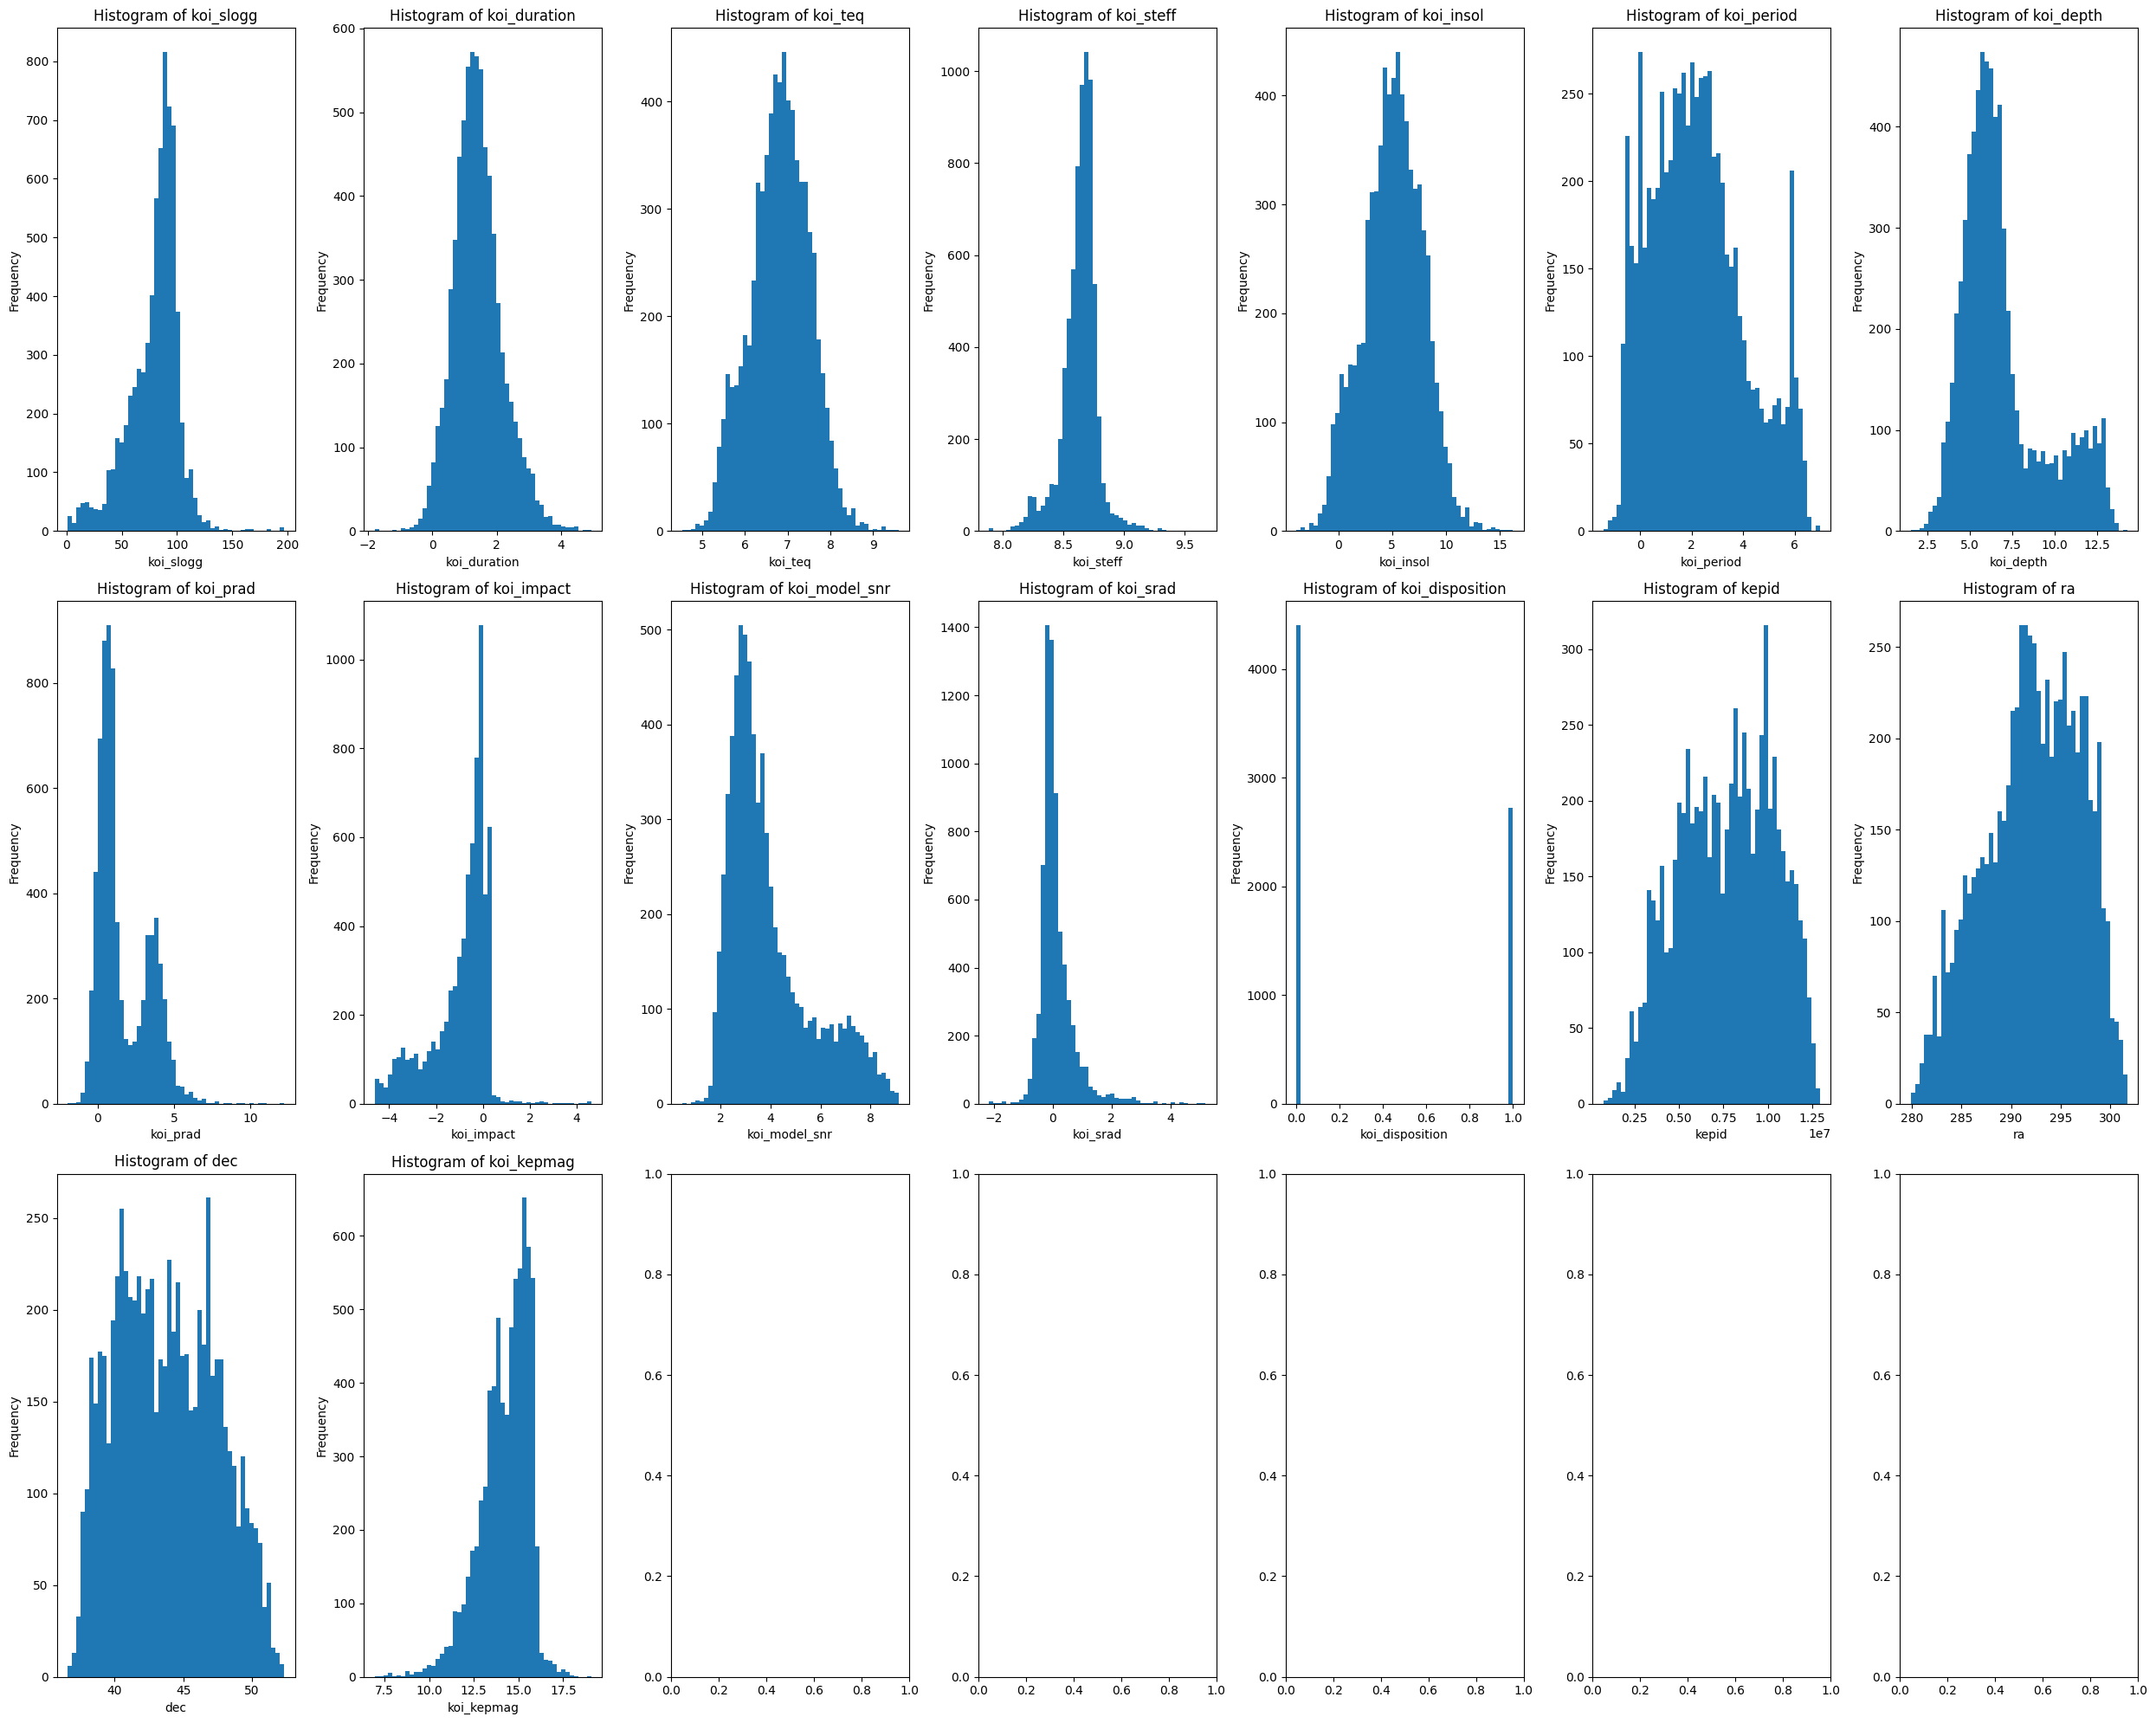

In [56]:
# Create a figure and an array of axes
fig, axs = plt.subplots(nrows=3, ncols=7, figsize=(25, 20))  # Adjust layout to fit all subplots

# Flatten the array of axes for easier iteration
axs = axs.flatten()

# Loop through the columns of interest and corresponding axes
for ax, column in zip(axs, df_filtered_unskewed):
    ax.hist(df_filtered_unskewed[column].dropna(), bins=50)  # Use 50 bins
    ax.set_title(f'Histogram of {column}')
    ax.set_xlabel(column)
    ax.set_ylabel('Frequency')

# Disable unused axes if there are any (if you have fewer than 35 columns)
for ax in axs[len(columns_of_interest_with_err):]:
    ax.set_visible(False)

# Adjust spacings to avoid overlapping
plt.tight_layout()
plt.show()


### Interesting visualisation

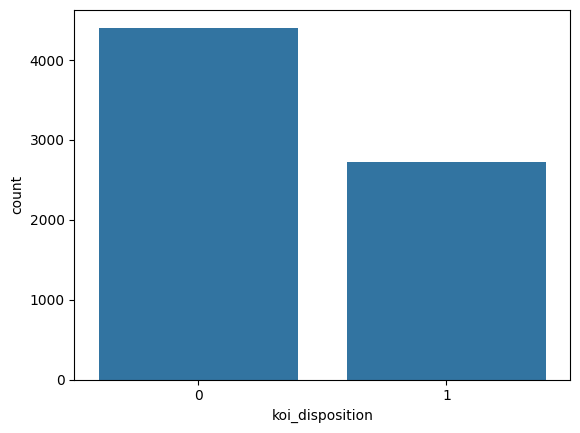

In [100]:
sns.countplot(x=df_filtered["koi_disposition"])
plt.show()

### ML Tasks

In [57]:
error_columns = [
    'koi_period_err1', 'koi_period_err2', 'koi_time0bk_err1', 'koi_time0bk_err2',
    'koi_impact_err1', 'koi_impact_err2', 'koi_duration_err1', 'koi_duration_err2',
    'koi_depth_err1', 'koi_depth_err2', 'koi_insol_err1', 'koi_insol_err2',
    'koi_steff_err1', 'koi_steff_err2', 'koi_slogg_err1', 'koi_slogg_err2',
    'koi_srad_err1', 'koi_srad_err2'
]

error_data = df_filtered_with_err[['kepid'] + error_columns]

# Performing the merge without setting index
df_filtered_unskewed_with_err = pd.merge(df_filtered_unskewed, error_data, on='kepid', how='left')

In [59]:
import pandas as pd
import numpy as np
from sklearn.model_selection import StratifiedKFold, cross_validate
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

**1. Normalized Dataset without Errors (df_filtered_unskewed):**
   - **Used Models:** I'll be using Logistic Regression

In [60]:
X = df_filtered_unskewed.drop(['kepid', 'koi_disposition'], axis=1)
y = df_filtered_unskewed['koi_disposition']

In [61]:
# Set up cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Metrics to evaluate
scoring = {'accuracy': 'accuracy',
           'precision': make_scorer(precision_score, average='binary'),
           'recall': make_scorer(recall_score, average='binary'),
           'f1': make_scorer(f1_score, average='binary'),
           'roc_auc': 'roc_auc'}


In [62]:
# Set up the logistic regression model
model = LogisticRegression(max_iter=100000)

# Run cross-validation without PCA
scores_no_pca = cross_validate(model, X, y, scoring=scoring, cv=cv, return_train_score=False)

# Display results without PCA
print("Cross-validation results without PCA:")
for key, values in scores_no_pca.items():
    print(f"{key}: {np.mean(values):.3f} ± {np.std(values):.3f}")

Cross-validation results without PCA:
fit_time: 2.078 ± 0.198
score_time: 0.024 ± 0.008
test_accuracy: 0.779 ± 0.007
test_precision: 0.701 ± 0.015
test_recall: 0.739 ± 0.017
test_f1: 0.719 ± 0.007
test_roc_auc: 0.859 ± 0.010


The logistic regression model applied to the unskewed dataset without errors shows an F1 score of 0.719 and an accuracy of 0.779. These metrics indicate a fair level of performance, with the model correctly predicting around 77.9% of cases and balancing precision and recall reasonably well.

**2. Basic Dataset with Errors (df_filtered_main_with_err):**
   - **Description:** This dataset includes measurement errors to better capture the variability and uncertainty.
   - **Used Models:** Because of their robustness to noise and variations, Random Forest and XGBoost are our go-to models.

In [88]:
from sklearn.model_selection import StratifiedKFold, cross_validate
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from xgboost import XGBClassifier
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

In [89]:
# Prepare features and targets
X_main_with_err = df_filtered_with_err.drop(['kepid', 'koi_disposition'], axis=1)
y_main_with_err = df_filtered_with_err['koi_disposition']

In [96]:
# Set up cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Metrics to evaluate
scoring = {'accuracy': 'accuracy',
           'precision': make_scorer(precision_score, average='binary'),
           'recall': make_scorer(recall_score, average='binary'),
           'f1': make_scorer(f1_score, average='binary'),
           'roc_auc': 'roc_auc'}

In [97]:
# Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Run cross-validation
rf_scores = cross_validate(rf_model, X_main_with_err, y_main_with_err, scoring=scoring, cv=cv, return_train_score=False)

# Display results
print("Random Forest results without PCA:")
for key, values in rf_scores.items():
    print(f"{key}: {np.mean(values):.3f} ± {np.std(values):.3f}")


Random Forest results without PCA:
fit_time: 2.506 ± 0.095
score_time: 0.052 ± 0.012
test_accuracy: 0.938 ± 0.008
test_precision: 0.929 ± 0.007
test_recall: 0.907 ± 0.014
test_f1: 0.918 ± 0.010
test_roc_auc: 0.981 ± 0.002


XGboost on the dataset without errors

In [99]:
# XGBoost model
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

# Run cross-validation
xgb_scores = cross_validate(xgb_model, X_main_with_err, y_main_with_err, scoring=scoring, cv=cv, return_train_score=False)

# Display results
print("XGBoost results without PCA:")
for key, values in xgb_scores.items():
    print(f"{key}: {np.mean(values):.3f} ± {np.std(values):.3f}")


XGBoost results without PCA:
fit_time: 0.476 ± 0.018
score_time: 0.039 ± 0.002
test_accuracy: 0.942 ± 0.008
test_precision: 0.919 ± 0.014
test_recall: 0.930 ± 0.012
test_f1: 0.924 ± 0.010
test_roc_auc: 0.985 ± 0.002


The evaluation of Random Forest and XGBoost on the Basic Dataset with Errors (df_filtered_main_with_err) demonstrates their strong performance in handling noisy data. The Random Forest model exhibits excellent classification metrics with an accuracy of 93.8%, F1 score of 91.8%, and an impressive ROC AUC of 98.1%, highlighting its robustness in distinguishing between confirmed exoplanets and false positives. Similarly, XGBoost marginally outperforms Random Forest in accuracy (94.2%) and ROC AUC (98.5%), with a significantly faster fit time, indicating greater computational efficiency alongside high predictive reliability. Both models' capability to effectively manage datasets with measurement errors confirms their suitability for applications in environments with varying data quality, ensuring reliable and accurate predictions even under challenging conditions.

**3. Normalized Dataset with Errors (df_filtered_unskewed_with_err):**
   - **Description:** Here, we've combined logarithmic normalization with error data, which makes it complex enough for more advanced models.
   - **Suggested Pre-processing:** We plan to use PCA to reduce the dimensionality before we dive into modeling.
   - **Suggested Models:** Advanced neural networks will be used here, especially after we've reduced dimensionality.

In [81]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

In [ ]:
X = df_filtered_unskewed.drop(['kepid', 'koi_disposition'], axis=1)
y = df_filtered_unskewed['koi_disposition']

In [95]:
# Split the data first
X_train, X_test, y_train, y_test = train_test_split(X_unskewed_err, y_unskewed_err, test_size=0.2, random_state=42)

# Normalize the training data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)  # Apply the same transformation to test data

# Apply PCA
pca = PCA(n_components=0.90)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)  # Apply the same transformation to test data

# Build the model
model = Sequential([
    Dense(128, activation='relu', input_dim=X_train_pca.shape[1]),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train_pca, y_train, epochs=50, batch_size=32, validation_split=0.2)

# Evaluate the model
predictions = model.predict(X_test_pca)
predictions = [1 if p > 0.5 else 0 for p in predictions.flatten()]
print("Accuracy:", accuracy_score(y_test, predictions))
print("Precision:", precision_score(y_test, predictions))
print("Recall:", recall_score(y_test, predictions))
print("F1 Score:", f1_score(y_test, predictions))

Epoch 1/50


C:\Users\nicol\anaconda3\envs\FinalProjectML\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


194/194 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8072 - loss: 0.4425 - val_accuracy: 0.9129 - val_loss: 0.2267
Epoch 2/50
194/194 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9094 - loss: 0.2324 - val_accuracy: 0.9206 - val_loss: 0.1995
Epoch 3/50
194/194 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9168 - loss: 0.2117 - val_accuracy: 0.9290 - val_loss: 0.1803
Epoch 4/50
194/194 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9228 - loss: 0.1994 - val_accuracy: 0.9310 - val_loss: 0.1814
Epoch 5/50
194/194 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9342 - loss: 0.1810 - val_accuracy: 0.9335 - val_loss: 0.1703
Epoch 6/50
194/194 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9382 - loss: 0.1699 - val_accuracy: 0.9303 - val_loss: 0.1729
Epoch 7/50
194/194 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9386 - loss: 0.1684 - val_accuracy: 0.9258 - val_loss: 0.1756
Epoch 8/50
194/194 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9304 - loss: 0.1785 - val_accuracy: 0.9329 - val_

The model achieves a high accuracy of approximately 93.03%, with a precision of 91.18%, and an exceptional recall rate of 96.09%. This high recall indicates that the model is particularly effective at identifying true positives, a crucial aspect in scenarios where missing a positive case (such as a confirmed exoplanet) can be costly. The F1 score of 93.57% balances precision and recall, underscoring the model's robust performance across various metrics. These results validate the use of advanced neural networks for this dataset, emphasizing their capability to navigate complex data structures and maintain high performance, even when faced with data intricacies and uncertainties.